In [1]:
import sys
sys.path.append("..\..")

from src.data.datasets.pause_dataset import PauseDataset
from src.data.loaders.pause_loader import get_pause_dataloader
from src.nn.models.PauseNet import PauseNet
from src.data.structures.sample import Sample

In [2]:
train_dataset = PauseDataset.from_path("..\\..\\datasets\\melody_extraction\\processed\\train")

Preprocessing data: 100%|██████████| 1233/1233 [00:16<00:00, 76.52it/s] 


In [3]:
print(len(train_dataset.sliced_audio))
print(len(train_dataset.sliced_melody))

1233
1233


Длительность аудио: 7.4996825396825395
Длительность мелодии: 6.5625


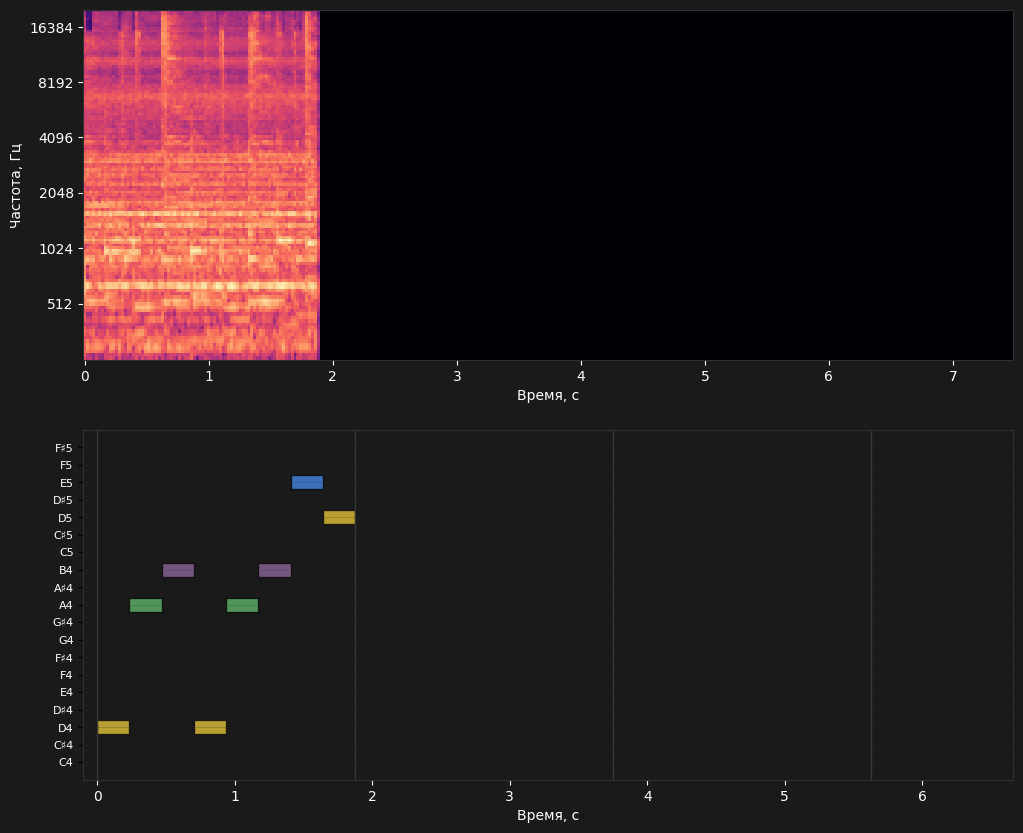

In [25]:
idx = 7
audio = train_dataset.sliced_audio[idx]
melody = train_dataset.sliced_melody[idx]

sample = Sample(audio, melody)
sample.visualize_with_spectrogram()

print(f"Длительность аудио: {audio.duration}")
print(f"Длительность мелодии: {melody.duration}")

In [26]:
train_loader = get_pause_dataloader(train_dataset, batch_size=32, num_workers=0, shuffle=False)
spectrograms, classes = next(iter(train_loader))

In [27]:
spectrograms.shape

torch.Size([32, 1, 128, 256])

In [28]:
classes.shape

torch.Size([32, 64])

In [29]:
spectrograms[idx]

tensor([[[ 0.1623, -0.2834, -0.4326,  ..., -4.9729, -4.9217, -4.8107],
         [ 0.4338, -0.1801, -0.5037,  ..., -6.6665, -6.6665, -6.6665],
         [ 0.6815,  0.8124,  0.7472,  ..., -6.6665, -6.6665, -6.6665],
         ...,
         [-0.3750, -1.5950, -0.8963,  ..., -6.6665, -6.6665, -6.6665],
         [-0.3199, -1.5031, -0.9137,  ..., -6.6665, -6.6665, -6.6665],
         [-0.5054, -1.8065, -1.1587,  ..., -6.6665, -6.6665, -6.6665]]])

In [30]:
classes[idx]

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [31]:
model = PauseNet()
classes = model.forward(spectrograms)

In [32]:
classes.shape

torch.Size([32, 64])

In [33]:
classes

tensor([[0.5007, 0.4979, 0.5004,  ..., 0.5032, 0.4935, 0.4935],
        [0.5048, 0.4925, 0.4964,  ..., 0.5025, 0.5030, 0.5000],
        [0.5076, 0.4937, 0.5026,  ..., 0.4996, 0.5017, 0.4910],
        ...,
        [0.5028, 0.4927, 0.5011,  ..., 0.5027, 0.5034, 0.4969],
        [0.5013, 0.4987, 0.4979,  ..., 0.5034, 0.5019, 0.4966],
        [0.5025, 0.4954, 0.4979,  ..., 0.4957, 0.5017, 0.4971]],
       grad_fn=<SigmoidBackward0>)